In [1]:
import os
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt

from keras.models import Model
from keras.applications import InceptionV3
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from keras.layers import BatchNormalization
from keras.utils import np_utils

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
import xml.etree.ElementTree as ET

In [3]:
train_labels = []

xml = ['AA_Crossing_01-D.xml', 'AA_Easy_01-D.xml', 'AA_Easy_02-D.xml', 'AA_Easy_Entrance-D.xml', 'Munich01-D.xml', 'AA_Walking_01-D.xml', 'RaR_Snack_Zone_01-D.xml']

for file_name in xml:
    print(file_name)
    tree = ET.parse("./Data_Sets/IPF Detections/" + file_name)
    root = tree.getroot()

    for frame in root:
        file = frame.attrib['file'].split('/')
        file = "./Data_Sets/x_train/" + file[-1]
        for objectlist in frame:
            for object in objectlist:
                label = []
                label.append(file)
                label.append(object[0].attrib['xc'])
                label.append(object[0].attrib['yc'])
                label.append(object[0].attrib['w'])
                label.append(object[0].attrib['h'])
                train_labels.append(label)


AA_Crossing_01-D.xml
AA_Easy_01-D.xml
AA_Easy_02-D.xml
AA_Easy_Entrance-D.xml
Munich01-D.xml
AA_Walking_01-D.xml
RaR_Snack_Zone_01-D.xml


In [4]:
test_labels = []

xml = ['AA_Crossing_02-D.xml', 'AA_Entrance_01-D.xml', 'AA_Walking_02-D.xml', 'AA_Easy_Entrance-D.xml', 'Munich02-D.xml', 'RaR_Snack_Zone_02-D.xml', 'RaR_Snack_Zone_04-D.xml']

for file_name in xml:
    print(file_name)
    tree = ET.parse("./Data_Sets/IPF Detections/" + file_name)
    root = tree.getroot()

    for frame in root:
        file = frame.attrib['file'].split('/')
        file = "./Data_Sets/x_test/" + file[-1]
        for objectlist in frame:
            for object in objectlist:
                label = []
                label.append(file)
                label.append(object[0].attrib['xc'])
                label.append(object[0].attrib['yc'])
                label.append(object[0].attrib['w'])
                label.append(object[0].attrib['h'])
                test_labels.append(label)

AA_Crossing_02-D.xml
AA_Entrance_01-D.xml
AA_Walking_02-D.xml
AA_Easy_Entrance-D.xml
Munich02-D.xml
RaR_Snack_Zone_02-D.xml
RaR_Snack_Zone_04-D.xml


In [5]:
test_labels


[['./Data_Sets/x_test/ON0173.png', '295.432', '19.9599', '4', '4'],
 ['./Data_Sets/x_test/ON0173.png', '309.724', '31.4107', '4', '4'],
 ['./Data_Sets/x_test/ON0173.png', '291.396', '19.3421', '4', '4'],
 ['./Data_Sets/x_test/ON0173.png', '295.53', '42.7952', '4', '4'],
 ['./Data_Sets/x_test/ON0173.png', '263.859', '20.8851', '4', '4'],
 ['./Data_Sets/x_test/ON0173.png', '246.956', '12.0915', '4', '4'],
 ['./Data_Sets/x_test/ON0173.png', '295.938', '53.168', '4', '4'],
 ['./Data_Sets/x_test/ON0173.png', '310.47', '64.1506', '4', '4'],
 ['./Data_Sets/x_test/ON0173.png', '300.905', '58.5796', '4', '4'],
 ['./Data_Sets/x_test/ON0173.png', '287.853', '51.0556', '4', '4'],
 ['./Data_Sets/x_test/ON0173.png', '262.296', '33.7098', '4', '4'],
 ['./Data_Sets/x_test/ON0173.png', '310.699', '73.8052', '4', '4'],
 ['./Data_Sets/x_test/ON0173.png', '305.093', '71.0743', '4', '4'],
 ['./Data_Sets/x_test/ON0173.png', '255.472', '41.2836', '4', '4'],
 ['./Data_Sets/x_test/ON0173.png', '295.482', '75.3

In [290]:
train_labels = train_labels[:-1324]
len(train_labels)

33100

In [5]:
area = (0, 0, 409, 387)
x_train = []
y_train = []
# i = 1
for file in train_labels:
    filename = file[0].split('/')[-1]
    if filename.endswith(".png"):
        try:
            img = load_img("./Data_Sets/x_train/" + filename)
        except:
            continue
        cropped_img = img.crop(area)
        img_array = img_to_array(cropped_img) / 255
        x_train.append(img_array)
        y_train.append(file[1:])
    else:
        continue

In [ ]:
area = (0, 0, 409, 387)
x_test = []
y_test = []
# i = 1
for file in test_labels:
    filename = file[0].split('/')[-1]
    if filename.endswith(".png"):
        try:
            img = load_img("./Data_Sets/x_test/" + filename)
        except:
            continue
        cropped_img = img.crop(area)
        img_array = img_to_array(cropped_img) / 255
        x_test.append(img_array)
        y_test.append(file[1:])
    else:
        continue

In [18]:
train_labels[0][1:]

['297.901', '28.1074', '4', '4']

In [29]:
np.array(y_train).reshape(26673,4,1).shape
np.array(x_train).shape

KeyboardInterrupt: 

In [6]:
x_train = np.array(x_train)
y_train = np.array(y_train)
# x_test = np.array(x_test)
# y_test = np.array(y_test)

In [158]:
# Create model
model = Sequential()

# Add first convolutional layer - output:(32x32x32)
model.add(Conv2D(input_shape=(387, 409, 3), data_format='channels_last',
                filters=20, kernel_size=(5,5), strides=(1,1),
                padding='same', kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Add max-pooling layer (16x16x32)
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same',
                       data_format='channels_last'))

# Add second convolutional layer (14x14x64)
model.add(Conv2D(filters=20, kernel_size=(5,5), strides=(1,1),
                 padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Add max-pooling layer (6x6x128)
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same',
                       data_format='channels_last'))

# Add third convolutional layer (12x12x128)
model.add(Conv2D(filters=20, kernel_size=(5,5), strides=(1,1),
                 padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Add max-pooling layer (6x6x128)
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same',
                       data_format='channels_last'))


#Add up-sampling layer
model.add(UpSampling2D(size=(2, 2), data_format=None))

# Add third convolutional layer (12x12x128)
model.add(Conv2D(filters=20, kernel_size=(5,5), strides=(1,1),
                 padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))

#Add up-sampling layer
model.add(UpSampling2D(size=(2, 2), data_format=None))


# Add second convolutional layer (14x14x64)
model.add(Conv2D(filters=20, kernel_size=(5,5), strides=(1,1),
                 padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))

#Add up-sampling layer
model.add(UpSampling2D(size=(2, 2), data_format=None))

# Add second convolutional layer (14x14x64)
model.add(Conv2D(filters=20, kernel_size=(5,5), strides=(1,1),
                 padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Add second convolutional layer (14x14x64)
model.add(Conv2D(filters=3, kernel_size=(8,1), strides=(1,1),
                 padding='valid'))
model.add(Activation('sigmoid'))
model.add(Dropout(0.2))

model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_85 (Conv2D)           (None, 161, 168, 20)      1520      
_________________________________________________________________
activation_85 (Activation)   (None, 161, 168, 20)      0         
_________________________________________________________________
dropout_85 (Dropout)         (None, 161, 168, 20)      0         
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 81, 84, 20)        0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 81, 84, 20)        10020     
_________________________________________________________________
activation_86 (Activation)   (None, 81, 84, 20)        0         
_________________________________________________________________
dropout_86 (Dropout)         (None, 81, 84, 20)        0         
__________

In [7]:
model = InceptionV3(weights='imagenet', include_top=False, input_shape=(387,409,3))

In [8]:
x = model.output
x = Flatten()(x)
x = Dense(4, activation='linear')(x) #minor edit
new_model = Model(input=model.input, output=x)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  after removing the cwd from sys.path.


In [9]:
for layer in model.layers:
    layer.trainable = False

In [10]:
new_model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

In [107]:
y_train[:, :1]

In [11]:
#fit model
new_model.fit(x_train, y_train, epochs=25, batch_size=128,
          shuffle=True)

Epoch 1/25
  128/26673 [..............................] - ETA: 2:46:44 - loss: 2402.5068

KeyboardInterrupt: 

In [ ]:
new_model.summary()

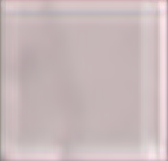

In [163]:
#run the model on x_test
reconstructed_imgs = model.predict(x_test)
array_to_img(reconstructed_imgs[0] * 255)